# The word2vec algorithm #

In section 1 we trained a Neural Network to identify the timbre of musical instrument contained in a time-series. The pipeline looked as follows:

~~~
Time-series Input -> Neural Network -> Timbre Identity of Input
~~~

You can imagine that the neural network could do more than classification of the input. For example, we could pass as input the timbre identity/identities of (a) musical instrument(s) at time $t$, and ask the neural network to tell us the timbre identity/identities of the instrument(s) at time $t-x$:

~~~~
Timbre(s) at t -> Neural Network -> Timbre(s) at t-x
~~~~

Would training a Neural Network to carry out this task make sense at all?

The way in which musical instrument timbre(s) appear after each other could be a very complicated task for a Neural Network to learn and achieve an accuracy anywhere close to %100.

However, the neural network could pick up that some musical instruments are likely to appear neighboring others (i.e. a symphony theme where violins and flutes alternate phrases every time the theme is played).  

Let's move from something abstract, like musical instrument timbres, to something more concrete, like lyrics in music.

If you think about it, some words in musical lyrics are more likely to appear next to others, for example:

_ love you

What _ this?

like a _ ball

There are several algorithms that can be trained to infer the relationships between words in text. Check for example the [GloVe](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) model.

In this notebook you will learn that the Neural Network we previously can very easily be turned into a model that learns how words in a "corpus" are related to each other.

To understand the theory we will use a small "corpus" containing the lyrics for a song's verse.

But the theory we will discuss can be applied to "corpora" of any size (i.e. including any number of songs).

```
I got idea man
You take me for a walk
Under the sycamore trees
The dark trees that blow, baby
In the dark trees that blow
```

Performed by Jimmy Scott
Music written by Angelo Badalamenti and lyrics by David Lynch

Once we have the corpora, the first step is to determine the vocabulary size (i.e. the number of unique words in the corpus). 

Here we have 19 unique words:
~~~
I got idea man You take me for a walk Under the sycamore trees dark that blow baby In 
~~~

Hence `V = 19`

Counting the number of different words is a step that is necessary in order to turn these words into "one-hot" vectors that we can pass into a Neural Network. 

Hence, we can different engineer `19-D` vectors that correspont to each word in the corpus:

$e_0 \in \mathbf{R^{1xV}}$ to the word `I`

$e_1 \in \mathbf{R^{1xV}}$ to the word `got`

$e_2 \in \mathbf{R^{1xV}}$ to the word `idea`

etc.

Once we have our "one-hot" word vectors, we recognize that the sentences
```
Under the sycamore trees
The dark trees that blow baby
```
Can be represented as:

$e_{10}$ $e_{11}$ $e_{12}$ $e_{13}$

$e_{11}$ $e_{14}$ $e_{13}$ $e_{15}$ $e_{16}$ $e_{17}$

With these one-hot vectors, we could easily train a neural network to classify each word. Let's start there.

In the next cell, you are given some parameters, dictionaries, and a "sparse" vector with the "one-hot" indices for the verse of the song.

In [2]:
# vocabulary size
V = 19

word_to_i = Dict("I" => 0, "got" => 1, "idea" => 2, "man" => 3, "You" => 4, "take" => 5, "me" => 6, "for" => 7, "a" => 8, "walk" => 9, "Under" => 10, "the" => 11, "sycamore" => 12, "trees" => 13, "dark" => 14, "that" => 15, "blow" => 16, "baby" => 17, "In" => 18)

i_to_word = Dict( 0 => "I", 1=> "got", 2 => "idea", 3 => "man", 4 => "You", 5=> "take", 6 => "me", 7 => "for", 8=> "a", 9 => "walk", 10 => "Under", 11 => "the", 12 => "sycamore", 13 =>"trees", 14=> "dark", 15 => "that", 16 => "blow", 17 => "baby",18 =>"In")

verse = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,11,14,13,15,16,17,18,11,14,13,15,16];

# let's see the verse
for i = 1:size(verse)[1]
    print(i_to_word[verse[i]], " ")
end

I got idea man You take me for a walk Under the sycamore trees the dark trees that blow baby In the dark trees that blow 

Now, with these verse vector, generate an `x` matrix containing one-hot vectors where the first row is a one-hot vector corresponding to the first word in the verse, and the last row is a one-hot vector corresponding to the last word in the verse. 

Also generate a y vector containing the index that contains the hot-`1` in each row of the `x` matrix.

Remember that Julia one-hot vectors will be indexed starting at one

In [15]:
#[ your code here:]

With `x` and `y`, you should be able to use the feedforward, one hidden-layer, NN you previously built in Julia. Make the hidden layer be of size `2`, so that we can visualize the `W_h` as an "embeddings" for each word (Why?)

Play with matrix initialization, changing the non-linearity, and hyperparameter tuning, until you obtain a loss close to zero

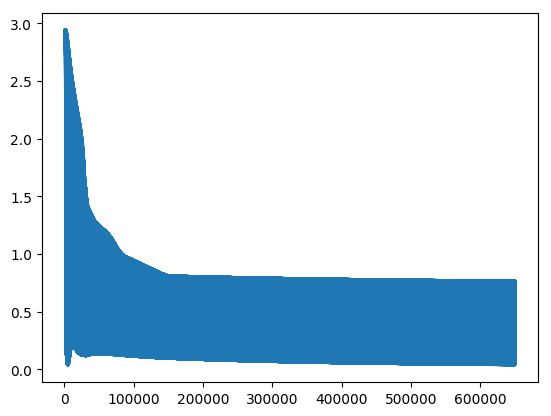

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4c5df54490>

In [4]:
#[ your code here:]

The following cell will plot your word embeddings

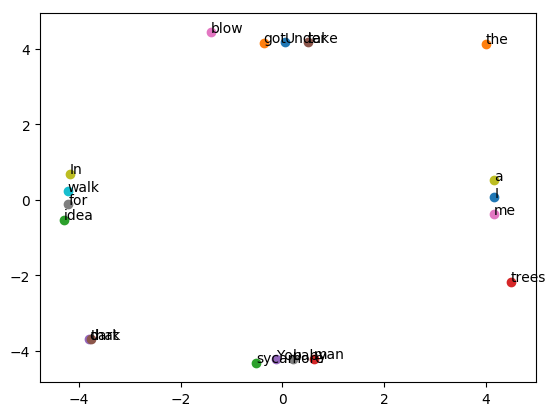

In [6]:
# this should generate a plot of your word_embeddings

using PyPlot

for i=1:V
    scatter(W_h[i,1], W_h[i,2])
    annotate(i_to_word[i-1],(W_h[i,1], W_h[i,2]))
end

The results above are not that interesting, as the Neural Network is not learning relationsips between the words.

A more interesting experiment would be to pass as input a word, and make the network anticipate the next one.

For this, we will need to add an `<end>` token to the dictionary (and also to the `x` and `y` matrices), since the last word of the verse is followed the by "end". 

The cell bellow will add the token for you.

In [7]:
V += 1

# correcting for the indexing starting at zero
verse = [verse - 1; V-1]
word_to_i["<end>"] = V-1
i_to_word[V-1] = "<end>"

x = [x zeros(size(x)[1],1)]
x = [x; zeros(1,V)]
x[end,end] = 1

# correcting for the indexing starting at 1
y = verse + 1;

# let's see the verse
for i = 1:size(verse)[1]
    print(i_to_word[verse[i]], " ")
end

I got idea man You take me for a walk Under the sycamore trees the dark trees that blow baby In the dark trees that blow <end> 

Now train the Neural network, so that given an input word it can predict the next word.

How low do you expect the loss to get?

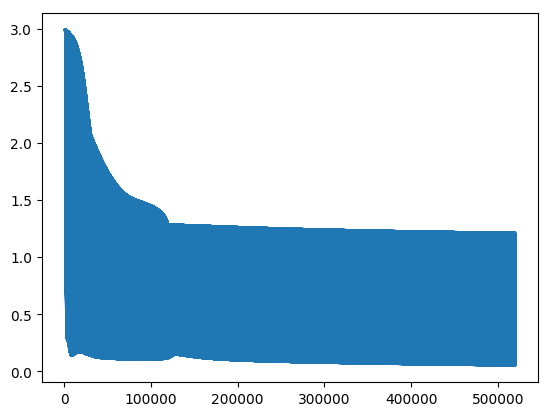

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4c5d21b390>

In [8]:
#[ your code here:]

The following cell will plot your word embeddings

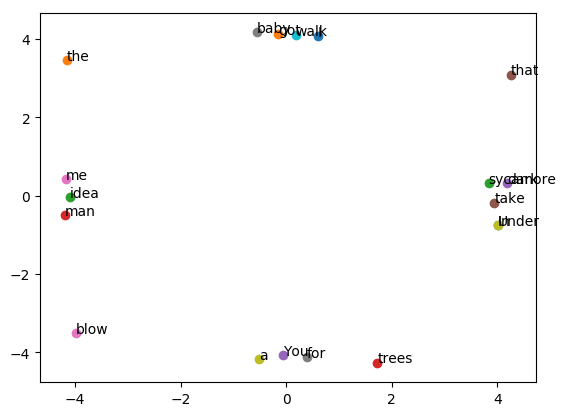

In [9]:
# this should generate a plot of your word_embeddings

using PyPlot

for i=1:V-1
    scatter(W_h[i,1], W_h[i,2])
    annotate(i_to_word[i-1],(W_h[i,1], W_h[i,2]))
end

What do you notice? 

What would the next logical step be?

Now train the Neural network, so that given an input word it can predict the PREVIOUS word.

How low do you expect the loss to get?

In [10]:
# first add the start token
#[ your code here:]

<start> I got idea man You take me for a walk Under the sycamore trees the dark trees that blow baby In the dark trees that blow <end> 

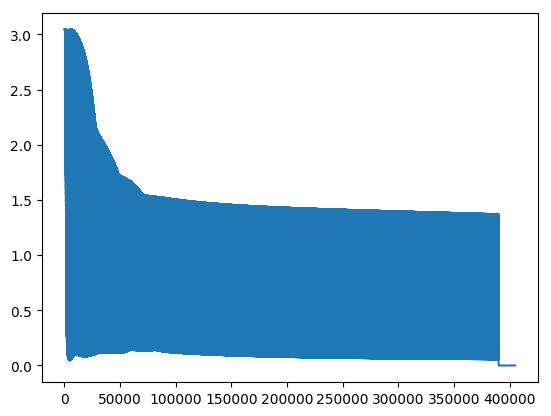

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4c5d05b390>

In [11]:
#[ your code here:]

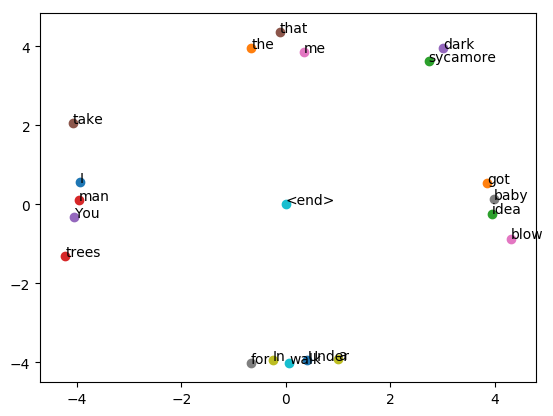

In [12]:
# this should generate a plot of your word_embeddings

using PyPlot

for i=1:V-1
    scatter(W_h[i,1], W_h[i,2])
    annotate(i_to_word[i-1],(W_h[i,1], W_h[i,2]))
end

The next step would be to look both sides around each word. This model is called the [skip-gram model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/).

<img src="http://blog.aylien.com/wp-content/uploads/2016/10/skip-gram.png" style="width: 200px"/>

In this model, there usually is no non-linearity leading to to the hidden-layer (the only non-linearity is softmax). Hence. The forward propagation is: 

$$ \hat{y} = softmax(x~W^{(h)}~W^{(o)})$$

And the objective function is:

$$J = minimize\{-log\big(\prod_c^C\hat{y}_{c}\big)\}$$

Where $C$ is the number of context words around the input $x$.

The backward pass w.r.t $W^{(o)}$ will be:

$\frac{\partial J }{\partial W^{(o)}} = \sum_c^C \bigg(~\big(W^{(h)}\big)^T~x^T\bigg)~(\hat{y} - e_c)$

and w.r.t $W^{(h)}$ will be:

$\frac{\partial J }{\partial W^{(h)}} = \sum_c^C \big(x^T~(\hat{y} - e_c)\big) ~\big(W^{(o)}\big)^T$

Implement this model in the following cell with a context size of two (i.e. training to predict one word before and word after the input word).

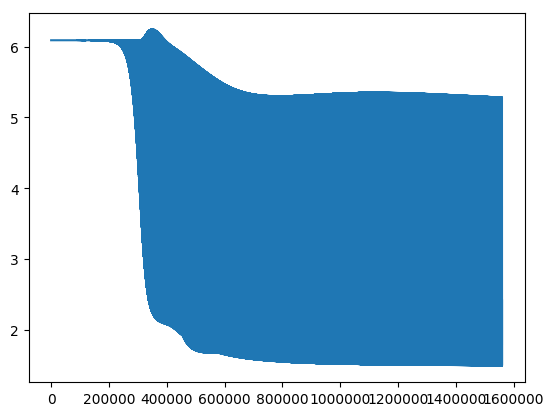

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4c5cea3d50>

In [13]:
#[ your code here:]

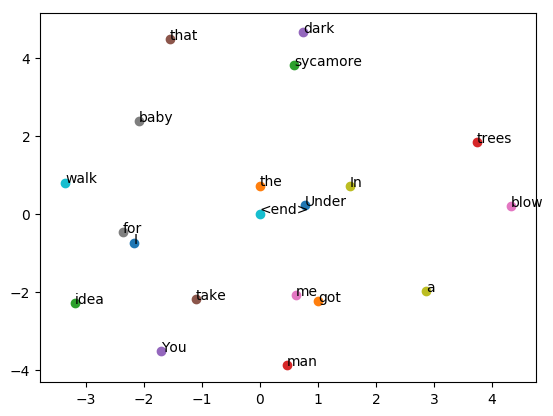

In [14]:
# this should generate a plot of your word_embeddings

using PyPlot

for i=1:V-1
    scatter(W_h[i,1], W_h[i,2])
    annotate(i_to_word[i-1],(W_h[i,1], W_h[i,2]))
end

In spirit, what we have built is very similar to the [word2vec](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) model developed by Mikolov et al. at at Google.

The only major differences are:
* Optimized computation of softmax
* Negative subsampling, so that words that appear more often in the corpus are less likely to be shown to the model.